In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


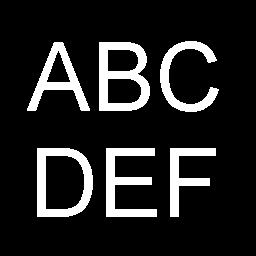

In [3]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/abcdef.bmp')
print(img.shape)
gimg=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg, cmap='gray')
cv2_imshow(gimg)

In [10]:
numLabels, labels = cv2.connectedComponents(gimg)
print(numLabels)

7


In [13]:
print(labels.shape)
print(labels)

(256, 256)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


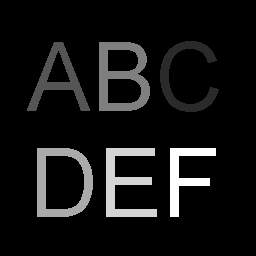

In [15]:
label_H = np.uint8(labels*255/np.max(labels))
cv2_imshow(label_H)

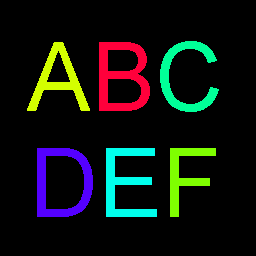

In [19]:
bank = 255*np.ones_like(label_H)
labelimg= cv2.merge((label_H,bank,bank))
labelimg=cv2.cvtColor(labelimg, cv2.COLOR_HSV2RGB)
labelimg[label_H==0]=0
cv2_imshow(labelimg)

(256, 256, 3)


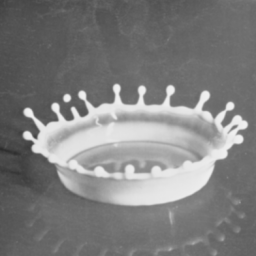

In [20]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/milkdrop.bmp')
print(img.shape)
gimg=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg, cmap='gray')
cv2_imshow(gimg)

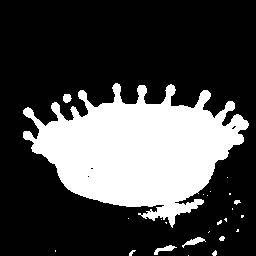

In [23]:
ret, thresh = cv2.threshold(gimg, 127, 255, 0)
cv2_imshow(thresh)

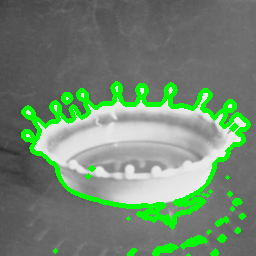

In [25]:
contour, hierchy =cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img, contour, -1, (0,255,0), 3)
cv2_imshow(img)